# (2019 Ford Gobike Exploration)
## by (Courage Siameh)


## Investigation Overview
    The relationship between the various variables plotted is seen collectively, and information is displayed simultaneously, strengthening some of the patterns identified in the preceding bivariate investigation as well as the univariate study. Subscribers' efficient or short periods of consumption are consistent with their high concentration during Monday through Friday rush hours, showing that the use is mostly for commuting to work. Customers clearly utilize the bike sharing system considerably differently than subscribers, frequently on weekends and in the afternoons, likely for leisure or city tours, as seen by the more flexible and lax pattern of their usage.


## Key Insights for Presentation
    Insight #1
    More bikers  seem to cover or take short distance trips from 0 to 2km whereas an even lesser number of riders embark on long distant bike trips within the distances of 3 to 5km. time of day, day of the week, and gender amongst others are underlying factors with come correlation to our histogram data plot.

    Insight #2
    Much more subscriber usage is seen as compared to the overallcasual customers. Theere's quite a drop in volume on weekends for subscribers indicating that they ride bikes for work commute during work days in the case of traffic congestion.The significant increase of use by customers on weekends can be related to leisure, touring and relaxing or workout purposes.
    
    Insight #3
    It is seen that the other gender has the greatest fluctuation, especially in the ages of40 years and beyond. 
    The male gender appears to have a steady movement along the line plot from the age 18 to 59 , with a massive fall within  the ages of 69. The ages of female at 57 years recorded a peak distance of 2.2 km.The ages of other at 60 years recored a peak distance of about 2.7 km.The ages of males at 18 years recored a peak distance of about 2.3 k 


## Dataset Overview

    The ('201902-fordgobike-tripdata.csv') data contains 63377 entries of trip records with 16 data columns which can then be split into 4 major categories for easy exploration ,analysis and visualization:

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike_copy = ford_gobike.copy()

In [3]:
 # issue #1 - fixing  multiple columns with incorrect dtypes 
gobike_copy['start_time'] = pd.to_datetime(gobike_copy['start_time'])
gobike_copy['end_time'] = pd.to_datetime(gobike_copy['end_time'])

gobike_copy['start_station_id'] = gobike_copy['start_station_id'].astype('str')
gobike_copy['end_station_id'] = gobike_copy['end_station_id'].astype('str')
gobike_copy['bike_id'] = gobike_copy['bike_id'].astype('str')

gobike_copy['user_type'] = gobike_copy['user_type'].astype('category')
gobike_copy['member_gender'] = gobike_copy['member_gender'].astype('category')

gobike_copy.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63377 entries, 0 to 63376
Data columns (total 16 columns):
duration_sec               63377 non-null int64
start_time                 63377 non-null datetime64[ns]
end_time                   63377 non-null datetime64[ns]
start_station_id           63377 non-null object
start_station_name         63294 non-null object
start_station_latitude     63377 non-null float64
start_station_longitude    63377 non-null float64
end_station_id             63377 non-null object
end_station_name           63293 non-null object
end_station_latitude       63376 non-null float64
end_station_longitude      63376 non-null float64
bike_id                    63377 non-null object
user_type                  63376 non-null category
member_birth_year          60687 non-null float64
member_gender              60687 non-null category
bike_share_for_all_trip    63376 non-null object
dtypes: category(2), datetime64[ns](2), float64(5), int64(1), object(6)
memory usag

In [4]:
'''addressing issue #2 by adding new columns for trip duration in minute,
trip start date in yyyy-mm-dd format, trip start hour of the day, 
day of week and month '''

gobike_copy['duration_minute'] = gobike_copy['duration_sec']/60

gobike_copy['start_date'] = gobike_copy.start_time.dt.strftime('%Y-%m-%d')
gobike_copy['start_hour_of_day'] = gobike_copy.start_time.dt.strftime('%H')
gobike_copy['start_day_of_week'] = gobike_copy.start_time.dt.strftime('%A')
gobike_copy['start_month'] = gobike_copy.start_time.dt.strftime('%B')

gobike_copy.sample(6)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_day,start_day_of_week,start_month
31899,296,2019-02-24 15:43:18.716,2019-02-24 15:48:15.232,253.0,Haste St at College Ave,37.866418,-122.253799,258.0,University Ave at Oxford St,37.872355,...,4582.0,Customer,1993.0,Male,No,4.933333,2019-02-24,15,Sunday,February
62305,491,2019-02-20 17:02:56.789,2019-02-20 17:11:08.335,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,256.0,Hearst Ave at Euclid Ave,37.875112,...,5685.0,Subscriber,1997.0,Male,Yes,8.183333,2019-02-20,17,Wednesday,February
4069,413,2019-02-28 16:31:45.949,2019-02-28 16:38:39.350,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,5364.0,Subscriber,1979.0,Male,No,6.883333,2019-02-28,16,Thursday,February
21146,343,2019-02-26 09:34:57.360,2019-02-26 09:40:41.235,219.0,Marston Campbell Park,37.809824,-122.280192,7.0,Frank H Ogawa Plaza,37.804562,...,3327.0,Subscriber,1978.0,Female,No,5.716667,2019-02-26,09,Tuesday,February
46576,458,2019-02-22 09:36:03.022,2019-02-22 09:43:42.007,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,5048.0,Subscriber,1993.0,Male,No,7.633333,2019-02-22,09,Friday,February
60054,565,2019-02-20 19:04:33.067,2019-02-20 19:13:58.871,114.0,Rhode Island St at 17th St,37.764478,-122.402570,373.0,Potrero del Sol Park (25th St at Utah St),37.751792,...,2409.0,Subscriber,1997.0,Male,No,9.416667,2019-02-20,19,Wednesday,February


In [5]:
# addressing issue 3 by appending new column that calculates bikers' age from 'member_birth_year' 

gobike_copy['member_age'] = 2019 - gobike_copy['member_birth_year']
gobike_copy.member_age.value_counts().head() 

31.0    3520
26.0    3279
30.0    3116
29.0    2978
27.0    2970
Name: member_age, dtype: int64

In [6]:
#filtering out outlier ages
gobike_copy = gobike_copy.query('member_age <= 70')

In [7]:
#casting 'member_birth_year' , 'member_age' columns to int dtype
gobike_copy['member_birth_year'] = gobike_copy['member_birth_year'].astype('int')
gobike_copy['member_age'] = gobike_copy['member_age'].astype('int')
gobike_copy.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60454 entries, 0 to 63375
Data columns (total 22 columns):
duration_sec               60454 non-null int64
start_time                 60454 non-null datetime64[ns]
end_time                   60454 non-null datetime64[ns]
start_station_id           60454 non-null object
start_station_name         60373 non-null object
start_station_latitude     60454 non-null float64
start_station_longitude    60454 non-null float64
end_station_id             60454 non-null object
end_station_name           60373 non-null object
end_station_latitude       60454 non-null float64
end_station_longitude      60454 non-null float64
bike_id                    60454 non-null object
user_type                  60454 non-null category
member_birth_year          60454 non-null int64
member_gender              60454 non-null category
bike_share_for_all_trip    60454 non-null object
duration_minute            60454 non-null float64
start_date                 60454 no

In [8]:
#the longitude and latitude start and end points are enough to create a new column for distance in kilometers
# code follows

import math
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [9]:
gobike_copy['distance_km'] = gobike_copy.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)

In [10]:
gobike_copy.distance_km.sample(4)

23084    0.634219
1286     1.089354
14487    2.031581
62228    0.925022
Name: distance_km, dtype: float64

## Distance by Number of trips
    Insight #1
    More bikers  seem to cover or take short distance trips from 0 to 2km whereas an even lesser number of riders embark on long distant bike trips within the distances of 3 to 5km. time of day, day of the week, and gender amongst others are underlying factors with come correlation to our histogram data plot


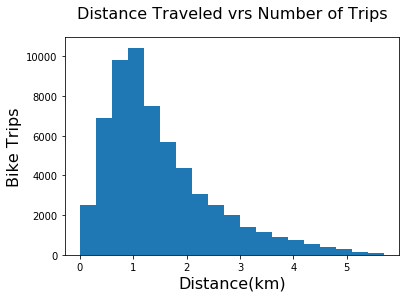

In [11]:
bin_edges = np.arange(0, 6, 0.3)
plt.hist(data = gobike_copy, x = 'distance_km', bins = bin_edges)
plt.title("Distance Traveled vrs Number of Trips", y = 1.06, fontsize = 16)
plt.xlabel('Distance(km)', fontsize = 16)
plt.ylabel('Bike Trips', fontsize = 16);

## Total counts of user_type by day of the week
    Insight #2
    Much more subscriber usage is seen as compared to the overall casual customers. Theere's quite a drop in volume on weekends for subscribers indicating that they ride bikes for work commute during work days in the case of traffic congestion.The significant increase of use by customers on weekends can be related to leisure, touring and relaxing or workout purposes.

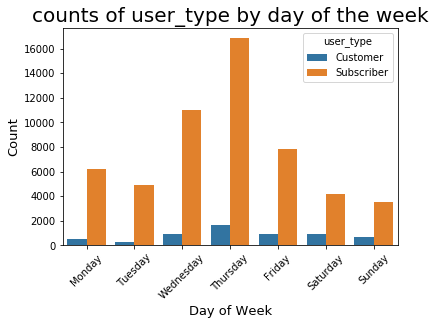

In [13]:
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# we cast 'start_day_of_week' to category dtype
weekdaycat = pd.api.types.CategoricalDtype(ordered = True, categories = weekday)
gobike_copy['start_day_of_week'] = gobike_copy['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=gobike_copy, x='start_day_of_week', hue='user_type');
plt.xlabel('Day of Week', fontsize = 13);
plt.xticks(rotation = 45)
plt.ylabel('Count',fontsize = 13);
plt.title('counts of user_type by day of the week', fontsize = 20);

##  The distances traveled by each age, separated by gender
    Insight #3
    It is seen that the other gender has the greatest fluctuation, especially in the ages of40 years and beyond. 
    The male gender appears to have a steady movement along the line plot from the age 18 to 59 , with a massive fall within the ages of 69. 
    The ages of female at 57 years recorded a peak distance of 2.2 km
    The ages of other at 60 years recored a peak distance of about 2.7 km
    The ages of males at 18 years recored a peak distance of about 2.3 km


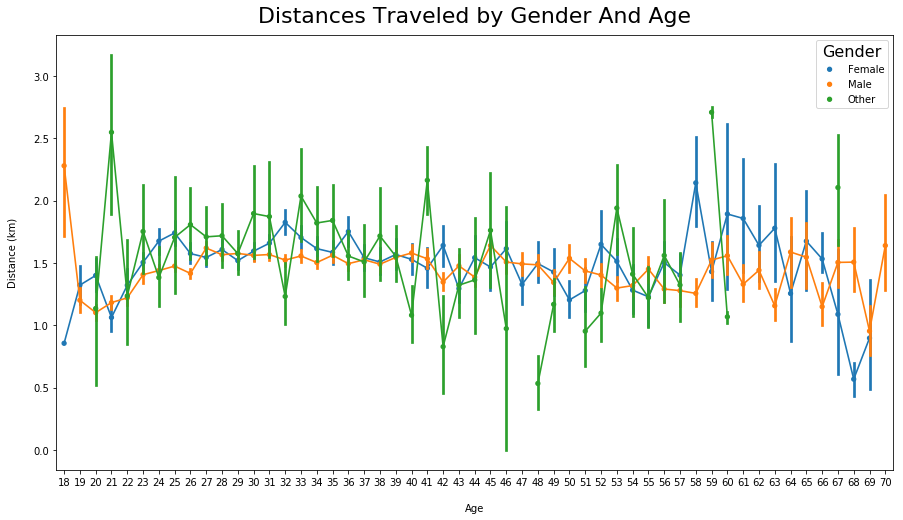

In [14]:
#The following graph is a line graph of the distances traveled by each age, separated by gender.

plt.figure(figsize=(15,8))
ax = sb.pointplot(x='member_age', y='distance_km', hue='member_gender', scale=.6, data=gobike_copy)
plt.title('Distances Traveled by Gender And Age', fontsize=22, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Distance (km)', labelpad=16)
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca();

### Generate Slideshow  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck1.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck1.ipynb to slides
[NbConvertApp] Writing 426323 bytes to Part_II_slide_deck1.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck1.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: n